# 2. Performance

As we deal with machine learning algorithms that aim at separating different classes, we can look at several metrics to determine performance. As introduced in the slides, efficiencies (probability to tag a given jet with its truth flavour) and misidentification rates (fraction of jets that are tagged, but actually have another truth flavour) play an important role. You can think of true positive (TP), and false positive (FP) rates.

At different values for specific tagger outputs, or for fractions of scores of form $\text{XvsY} = \frac{Prob (x) }{Prob(x) + Prob(y)}$ (a discriminator), such rates are determined, i.e. the distribution is scanned from 0 to 1 - and the corresponding TP and FP rates are shown in so called Receiver Operator Characteristic (ROC) curves. The area under such curves, AUC, is instead a summary metric that can be used to quickly evaluate a tagger performance inclusively.

1. Use the function `sklearn.metrics.roc_curve` to create ROC curves for DeepCSV and DeepJet, for BvsL, CvsB, CvsL. Limit yourself to selecting only those jets whose truth labels (targets) would match with the chosen discriminator, e.g. if you want to plot CvsL, select C and UDSG (light / L) jets only. While CvsB and CvsL are already available in the branches of the sample files, BvsL is slightly different from just using "B" - have a look at the definition of the discriminator and compute that disciminator yourself first.
2. Interpret the figures obtained in 1.: pick specific misidentification rates and look up which efficiencies you get for DeepCSV and DeepJet. How would a random classifier look like in your plot? How would a perfect classifier appear in such a ROC curve visualization? How do DeepCSV and DeepJet compare?
3. Compute the area under the curve (AUC) for all three discriminators mentioned in 1. Similar to 1., scikit-learn offers a function, in this case `sklearn.metrics.auc`.
4. Interpret the AUC scores, what do these values tell you about the difficulty of separating b from light, c from b, c from light jets? Can you make some guesses why this is the case?
6. _(Bonus)_ As for the first notebook, if you can quickly obtain results for the previous questions, repeat the study with a QCD sample and compare performance with the $t\bar{t}$ sample.

In [1]:
import sklearn.metrics

In [2]:
import uproot

In [3]:
import awkward as ak

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
sample_file = uproot.open('/eos/user/c/cmsdas/2023/short-ex-ftag/samples/TTToSemileptonic/pfnano-0.root')

In [7]:
jet_keys = sample_file['Events'].keys(filter_name=['Jet_*'])
for sample_jets in sample_file['Events'].iterate(jet_keys, step_size=sample_file['Events'].num_entries, library='ak'):
    break

In [8]:
# Hint for 1.:
Jet_btagCSVV2 = ak.flatten(sample_jets['Jet_btagCSVV2'], axis=-1)
rng = np.random.default_rng(seed = 42)
def example_flavour(N):
    flavour_samples = rng.choice(np.arange(4), size = N, p = [0.386, 0.111, 0.189, 0.314])
    return flavour_samples
dummy_flavour = example_flavour(len(Jet_btagCSVV2))
to_b_or_not_to_b = np.where(dummy_flavour < 2, 1, 0)
fpr, tpr, _ = sklearn.metrics.roc_curve(to_b_or_not_to_b, Jet_btagCSVV2, pos_label=1)

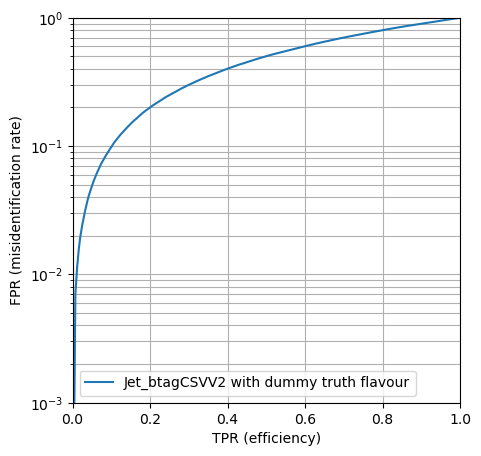

In [9]:
plt.subplots(figsize=(5,5))
plt.plot(tpr, fpr, label='Jet_btagCSVV2 with dummy truth flavour')
plt.yscale('log')
plt.ylim(1e-3,1.0)
plt.xlim(0,1.0)
plt.grid(which='minor')
plt.grid(which='major')
plt.xlabel('TPR (efficiency)')
plt.ylabel('FPR (misidentification rate)')
plt.legend()
# this is how it looks like when you just give completely arbitrary truth flavour, created by a random number generator

In [10]:
# now your turn to first of all:
# - select only certain jets based on truth flavour right from the beginning (depends on chosen discriminator!)
# - move to DeepCSV and DeepJet
# - insert the truth flavour instead of the randomnly created array when creating the ROC curve
#   (something to replace to_b_or_not_to_b with actual 1 or 0 based on the jet flavour, after chosing among BvsL, CvsB, CvsL!)

In [11]:
# Hint for 3.: auc takes two inputs, x and y, replace this with return values from the ROC curves
# Hint for 4.: What is the minimum, what the maximum achievable AUC?